In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Importing String processing libraries
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

#Importing Dataprocessing and Feature Engineering Libraries
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


#Importing Model Building Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import StackingClassifier,BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


#Importing Scoring Libraries
from sklearn import metrics
from sklearn.metrics import classification_report


In [50]:
df_train = pd.read_csv('train_set.csv')
df_train

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [51]:
df_train.shape

(33000, 2)

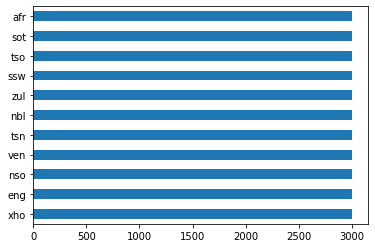

In [52]:
df_train['lang_id'].value_counts().plot(kind='barh')

In [53]:
#Function to clean data before modeling
def clean_title(title): 
    
    
  #  title = re.sub(r'[,!?;-]+', ' ', title) #Removing any remaining non-characters
 #   title = re.sub('[%s]' % re.escape(string.punctuation), ' ', title)
    title = word_tokenize(title)
    title = [word.strip() for word in title if len(word) > 2]
    title = ' '.join(title)
    
    return title 

In [54]:
df_train.iloc[1,-1]

'i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo'

In [55]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
term = df_train.iloc[1,-1]

In [57]:
clean_title(term)

'i-dha iya kuba nobulumko bokubeka umsebenzi naphi kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo'

In [58]:
df_copy = df_train.copy()

In [59]:
df_copy.loc[:,'clean_term'] = df_copy['text'].apply(clean_title)
df_copy

,lang_id,text,clean_term
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province kwazulu-natal department transpor...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,netefatša gore file dilo moka tše dumelelanego...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ndinganyiso mbeu ewa maana nga mula...
...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,popo dipolateforomo tse tlisa boeteledipele sa...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...,modise mosadi ntse utlwe hore thabang rata ike...
32997,eng,closing date for the submission of completed t...,closing date for the submission completed tend...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [60]:
# # Creating the Bag of Words vectorizer
# cv = CountVectorizer(max_features=2500)
# X = cv.fit_transform(df_copy.clean_term).toarray()

In [61]:
#scalar = MinMaxScaler()
#X_scaled = scalar.fit_transform(X_tfidf)

In [62]:
#Transforming text data into feature matrix
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2,
#                        ngram_range=(1,3),
                        stop_words='english')
# We transform each complaint into a vector
X_tfidf = tfidf.fit_transform(df_copy.clean_term)
# labels = df_train.sentiment
print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(X_tfidf.shape))

Each of the 33000 complaints is represented by 63899 features (TF-IDF score of unigrams and bigrams)


In [63]:
#Specifying target variables
y= df_copy.lang_id

In [64]:
#Encoding target variables before modelling
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(df_copy['lang_id'])
y_encoded

array([9, 9, 1, ..., 1, 9, 4])

In [65]:
#Spliting data into training and test set before fitting
X_train, X_test,y_train,y_test = train_test_split(X_tfidf,
                                                  y_encoded,
                                                  test_size=0.2,
                                                  random_state=0)

In [72]:
#generic function to fit model and return metrics for every algorithm
def boost_models(x):
    '''
    This function receives a model as a parameter, the target for the mordel is then transformed using the quantile transformer 
    to transform it. The model is then trained and tested and the Test set. The errors and accuraciers are then computed
    and returned as a function response
    '''
    
    #Instantiating model to be used
    model = x 
    algoname= x.__class__.__name__
   

    print ('Fitting {:s} model...'.format(algoname))
    #run_time = %timeit -q -o 
    model.fit(X_train, y_train)
    
    
    print ('... predicting')
    y_pred      = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='weighted')
    recall    = metrics.recall_score(y_train, y_pred, average='weighted')    
    f1        = metrics.f1_score(y_train, y_pred, average='weighted')    
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='weighted')   
    
    #Extracting the name of the algorithm
    
    return algoname, accuracy, precision, recall, f1, f1_test#, run_time.best


# # Instantiating base models that will be required by the adaboost regression model
# d_tree = DecisionTreeRegressor(max_depth= 7)
# lgbr = lgbm.LGBMRegressor()


classifiers = [
    LogisticRegression(max_iter=10000, multi_class='ovr', solver='liblinear'),
    MultinomialNB(),
    #KNeighborsClassifier(2),
    LinearSVC(penalty='l2',multi_class='ovr'),
    
    #SVC(kernel="linear", C=0.025),
#    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=7),
    RandomForestClassifier(max_depth=9, n_estimators=1000),
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
]
score=[]

for algo in classifiers:
    score.append(boost_models(algo))

 #Collate all scores in a table
results = pd.DataFrame(score, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test'])
results.set_index('Model')

Fitting LogisticRegression model...
... predicting
... scoring
Fitting MultinomialNB model...
... predicting
... scoring
Fitting LinearSVC model...
... predicting
... scoring


,Accuracy,Precision,Recall,F1 Train,F1 Test
Model,,,,,
LogisticRegression,0.999205,0.999205,0.999205,0.999205,0.995904
MultinomialNB,0.999886,0.999886,0.999886,0.999886,0.999697
LinearSVC,1.000000,1.000000,1.000000,1.000000,0.998788


In [34]:
#Building a Naive bayes Multinomial model as it performed better than other models

nv_model =  MultinomialNB()
nv_model.fit(X_train,y_train)
nv_model.score(X_test,y_test)


0.9975932611311673

In [41]:
y_test[0]

9

In [ ]:
#Building a Linear SVC model
svc_model =  LinearSVC(penalty='l2',multi_class='ovr')
svc_model.fit(X_train,y_train)
svc_model.score(X_test,y_test)

In [ ]:
#Evaluating LinearSVC model


In [ ]:
#Building a random forest regressor model : Hyper parameter tuning
rf = RandomForestClassifier()
forest_params = [
                 {'max_depth': list(range(10, 15)), 
                  'max_features': list(range(0,14)),
                  'criterion' : ['gini', 'entropy', 'log_loss'],
                  'n_estimators': list(range(100,1500,100))
                 }
                ]
                  

grid_rf_model = GridSearchCV(rf, forest_params, cv =5, scoring='accuracy')
grid_rf_model.fit(X_train, y_train) 
best_param = grid_rf_model.best_params_



In [ ]:
#Building Random forest model with best parameters from grid search
rf_model = RandomForestClassifier(
                                    random_state=42,
                                    n_estimators = best_param['n_estimators'],
                                    max_features = best_param['max_features'],
                                    max_depth = best_param['max_depth'],
                                    criterion = best_param['criterion']
)


rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

In [ ]:
#Building an XGboost classifer
xgmodel = XGBClassifier()
xgmodel.fit(X_train,y_train)
xgmodel.score(X_test,y_test)

In [ ]:
#Building an ensemble of best performing models so far using a stacking classifier

estimators = [
    ('lr', LogisticRegression(max_iter=10000, multi_class='ovr', solver='liblinear')),
    ('bayes',  MultinomialNB()),
    ('SVM',  LinearSVC(penalty='l2',multi_class='ovr'))
]

final = LogisticRegression(max_iter=10000, multi_class='ovr', solver='liblinear')


In [ ]:
#Model training and scoring of stacking classifier
st_classifier = StackingClassifier(estimators=estimators, final_estimator=final, cv=5)
st_classifier.fit(X_train, y_train)
st_classifier.score(X_test, y_test)

In [ ]:
#Reading test data in for submission
df_test = pd.read_csv('test_set.csv')

In [ ]:
df_test.loc[:,'cleaned_text'] = df_test['text'].apply(clean_title)
df_test.head()

,index,text,cleaned_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",Mmasepala maemo kgethegileng letlelela kgato
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,Winste buitelandse valuta


In [ ]:
#Transforming test data using tfidf vectroser  used earlier on
X_trial = tfidf.transform(df_test.cleaned_text)

In [ ]:
#Making predictions 
X_trial_pred = st_classifier.predict(X_trial)

In [ ]:
#decoding target variables for submission
y = encoder.inverse_transform(X_trial_pred)
y

array(['zul', 'nbl', 'zul', ..., 'sot', 'sot', 'zul'], dtype=object)

In [ ]:
df_test.loc[:,'lang_id'] = y

In [ ]:
sub = (df_test[['index','lang_id']]).set_index('index')

In [ ]:
sub.to_csv('submission11.csv')